<a href="https://colab.research.google.com/github/Tulasipotu08/hackathon/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import LabelEncoder

In [34]:
df=pd.read_csv('/content/monthly_member_totals.csv')

In [35]:
df.head()

,member_id,first_name,surname,sex,email,city,year,month,order_count,meals_count,monthly_budget,total_expense,balance,commission
0,47,Joyce,Newton,F,Joyce.Ne@gmail.com,Herzelia,2020,1,17,37,1836.15,500.0,-1336.15,136.27950
1,126,Macey,Almond,M,Macey.Almond@yahoo.com,Tel Aviv,2020,1,30,64,2676.98,1000.0,-1676.98,214.98500
2,68,Aydin,Hirst,M,Aydin.Hirst@hotmail.com,Tel Aviv,2020,1,24,52,2286.53,1000.0,-1286.53,164.93850
3,193,Mira,Kent,M,Mi.Kent@walla.co.il,Tel Aviv,2020,1,24,54,2547.62,500.0,-2047.62,193.59125
4,53,Lilly-Ann,Frey,F,Li.Fr@hotmail.com,Tel Aviv,2020,1,23,50,2456.64,1000.0,-1456.64,193.97650


In [36]:
print(df.shape)

(1200, 14)


In [37]:
df.columns

Index(['member_id', 'first_name', 'surname', 'sex', 'email', 'city', 'year',
       'month', 'order_count', 'meals_count', 'monthly_budget',
       'total_expense', 'balance', 'commission'],
      dtype='object')

In [38]:
df.describe()

,member_id,year,month,order_count,meals_count,monthly_budget,total_expense,balance,commission
count,1200.000000,1200.0,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,100.500000,2020.0,3.500000,25.535833,58.557500,2625.591392,706.500000,-1919.091392,201.461506
std,57.758376,0.0,1.708537,5.068049,13.041348,602.799442,190.099618,628.499209,47.505060
min,1.000000,2020.0,1.000000,10.000000,19.000000,764.870000,500.000000,-4225.790000,47.962500
25%,50.750000,2020.0,2.000000,22.000000,50.000000,2218.557500,500.000000,-2332.765000,168.794938
50%,100.500000,2020.0,3.500000,25.000000,58.000000,2616.790000,600.000000,-1918.310000,200.563125
75%,150.250000,2020.0,5.000000,29.000000,67.000000,3008.542500,800.000000,-1471.330000,231.695750
max,200.000000,2020.0,6.000000,45.000000,110.000000,4953.460000,1000.000000,235.130000,390.812500


In [53]:
df.dropna()

,member_id,first_name,surname,sex,email,city,year,month,order_count,meals_count,monthly_budget,total_expense,balance,commission
0,47,Joyce,Newton,F,Joyce.Ne@gmail.com,Herzelia,2020,1,17,37,1836.15,500.0,-1336.15,136.27950
1,126,Macey,Almond,M,Macey.Almond@yahoo.com,Tel Aviv,2020,1,30,64,2676.98,1000.0,-1676.98,214.98500
2,68,Aydin,Hirst,M,Aydin.Hirst@hotmail.com,Tel Aviv,2020,1,24,52,2286.53,1000.0,-1286.53,164.93850
3,193,Mira,Kent,M,Mi.Kent@walla.co.il,Tel Aviv,2020,1,24,54,2547.62,500.0,-2047.62,193.59125
4,53,Lilly-Ann,Frey,F,Li.Fr@hotmail.com,Tel Aviv,2020,1,23,50,2456.64,1000.0,-1456.64,193.97650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,185,Subhaan,Washington,M,Su.Wa@hotmail.com,Givatayim,2020,6,28,62,2569.51,500.0,-2069.51,200.62300
1196,62,Janine,Coulson,F,Ja.Coulson@gmail.com,Herzelia,2020,6,30,73,3286.34,500.0,-2786.34,242.53925
1197,145,Taran,Samuels,F,Ta.Samuels@hotmail.com,Herzelia,2020,6,27,61,2660.16,600.0,-2060.16,195.61925
1198,169,Emaan,Greenaway,M,Emaan.Greenaway@gmail.com,Herzelia,2020,6,25,67,2714.56,500.0,-2214.56,216.15675


In [40]:
df.isnull().sum()

member_id         0
first_name        0
surname           0
sex               0
email             0
city              0
year              0
month             0
order_count       0
meals_count       0
monthly_budget    0
total_expense     0
balance           0
commission        0
dtype: int64

In [41]:
df.fillna(0)

,member_id,first_name,surname,sex,email,city,year,month,order_count,meals_count,monthly_budget,total_expense,balance,commission
0,47,Joyce,Newton,F,Joyce.Ne@gmail.com,Herzelia,2020,1,17,37,1836.15,500.0,-1336.15,136.27950
1,126,Macey,Almond,M,Macey.Almond@yahoo.com,Tel Aviv,2020,1,30,64,2676.98,1000.0,-1676.98,214.98500
2,68,Aydin,Hirst,M,Aydin.Hirst@hotmail.com,Tel Aviv,2020,1,24,52,2286.53,1000.0,-1286.53,164.93850
3,193,Mira,Kent,M,Mi.Kent@walla.co.il,Tel Aviv,2020,1,24,54,2547.62,500.0,-2047.62,193.59125
4,53,Lilly-Ann,Frey,F,Li.Fr@hotmail.com,Tel Aviv,2020,1,23,50,2456.64,1000.0,-1456.64,193.97650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,185,Subhaan,Washington,M,Su.Wa@hotmail.com,Givatayim,2020,6,28,62,2569.51,500.0,-2069.51,200.62300
1196,62,Janine,Coulson,F,Ja.Coulson@gmail.com,Herzelia,2020,6,30,73,3286.34,500.0,-2786.34,242.53925
1197,145,Taran,Samuels,F,Ta.Samuels@hotmail.com,Herzelia,2020,6,27,61,2660.16,600.0,-2060.16,195.61925
1198,169,Emaan,Greenaway,M,Emaan.Greenaway@gmail.com,Herzelia,2020,6,25,67,2714.56,500.0,-2214.56,216.15675


In [25]:
len(df)

1200

In [42]:
a=df.drop(columns='email')

In [43]:
a.head()

,member_id,first_name,surname,sex,city,year,month,order_count,meals_count,monthly_budget,total_expense,balance,commission
0,47,Joyce,Newton,F,Herzelia,2020,1,17,37,1836.15,500.0,-1336.15,136.27950
1,126,Macey,Almond,M,Tel Aviv,2020,1,30,64,2676.98,1000.0,-1676.98,214.98500
2,68,Aydin,Hirst,M,Tel Aviv,2020,1,24,52,2286.53,1000.0,-1286.53,164.93850
3,193,Mira,Kent,M,Tel Aviv,2020,1,24,54,2547.62,500.0,-2047.62,193.59125
4,53,Lilly-Ann,Frey,F,Tel Aviv,2020,1,23,50,2456.64,1000.0,-1456.64,193.97650


In [44]:
selected_feature=['order_count,meals_count']

In [45]:
x=df['order_count']
y=df['meals_count']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x.values.reshape(-1,1),y,test_size=0.2,random_state=30)

In [47]:
model=RandomForestClassifier(n_estimators=100)

In [48]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
y_pred=model.predict(x_test)

In [50]:
accuracy=accuracy_score(y_test,y_pred)
print(f"accuracy:{accuracy}")

accuracy:0.058333333333333334


In [51]:
print(len(x_test)),print(len(y_pred))

240
240


(None, None)

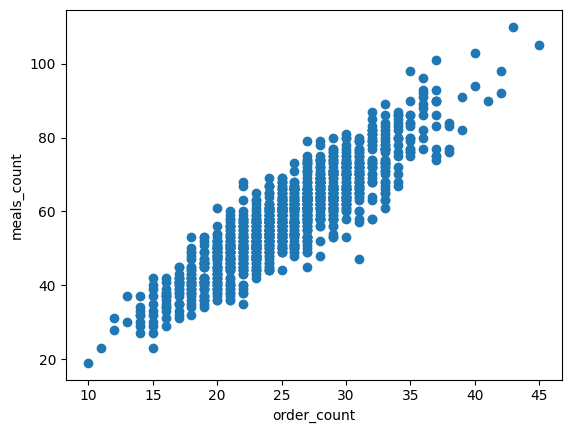

In [52]:
plt.scatter(df['order_count'],df['meals_count'])
plt.xlabel("order_count")
plt.ylabel("meals_count")
plt.show()